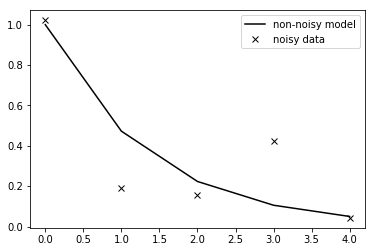

In [2]:
import pyabc
import os
import pickle
import matplotlib.pyplot as plt
from study_abc_noise.model import NonIdAblePrioredModelVars
%matplotlib inline

mv = NonIdAblePrioredModelVars()

model = mv.get_model()
model_noisy = mv.get_model_noisy()

if os.path.exists("data.dat"):
    data_nonoise, data = pickle.load(open("data.dat", 'rb'))
else:
    data_nonoise = model(mv.p_true)
    data = model_noisy(mv.p_true)
    pickle.dump((data_nonoise, data), open("data.dat", 'wb'))

plt.plot(data_nonoise['y'], '-', color='k', label="non-noisy model")
plt.plot(data['y'], 'x', color='k', label="noisy data")
plt.legend()
plt.savefig("data.svg", format='svg')
plt.savefig("data.eps", format='eps')

prior = mv.get_prior()

In [5]:
distance = mv.get_distance()

abc = pyabc.ABCSMC(model, prior, distance, population_size=10000)
abc.new("sqlite:///h_incorrect.db", data)
abc.run(max_nr_populations=8, min_acceptance_rate=1e-4)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-11 23:09:08.513060, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 41.905065294872294
INFO:ABC:t: 0, eps: 41.905065294872294.
INFO:ABC:Acceptance rate: 10000 / 20298 = 4.9266e-01, ESS=1.0000e+04.
INFO:ABC:t: 1, eps: 5.836618414886027.
INFO:ABC:Acceptance rate: 10000 / 20383 = 4.9060e-01, ESS=9.9335e+03.
INFO:ABC:t: 2, eps: 5.116160234445337.
INFO:ABC:Acceptance rate: 10000 / 20769 = 4.8149e-01, ESS=9.8479e+03.
INFO:ABC:t: 3, eps: 4.622291598598586.
INFO:ABC:Acceptance rate: 10000 / 20137 = 4.9660e-01, ESS=9.9618e+03.
INFO:ABC:t: 4, eps: 4.4327110492514805.
INFO:ABC:Acceptance rate: 10000 / 20283 = 4.9302e-01, ESS=9.9615e+03.
INFO:ABC:t: 5, eps: 4.378691040611171.
INFO:ABC:Acceptance rate: 10000 / 20184 = 4.9544e-01, ESS=9.9522e+03.
INFO:ABC:t: 6, eps: 4.364806363527902.
INFO:ABC:Acceptance rate: 10000 / 20051 = 4.9873e-01, ESS=9.9476e+03.
INFO:ABC:t: 7, eps: 4.361225337495876.
INFO:ABC:Acceptan

In [9]:
distance = mv.get_distance()

abc = pyabc.ABCSMC(model_noisy, prior, distance, population_size=10000)
abc.new("sqlite:///h_noisymodel.db", data)
abc.run(max_nr_populations=11, min_acceptance_rate=1e-4)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-11 23:14:41.278547, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 49.129797999507204
INFO:ABC:t: 0, eps: 49.129797999507204.
INFO:ABC:Acceptance rate: 10000 / 20399 = 4.9022e-01, ESS=1.0000e+04.
INFO:ABC:t: 1, eps: 10.193328475587418.
INFO:ABC:Acceptance rate: 10000 / 20020 = 4.9950e-01, ESS=9.8568e+03.
INFO:ABC:t: 2, eps: 6.607100690968085.
INFO:ABC:Acceptance rate: 10000 / 38881 = 2.5720e-01, ESS=9.2051e+03.
INFO:ABC:t: 3, eps: 4.698626319797624.
INFO:ABC:Acceptance rate: 10000 / 76119 = 1.3137e-01, ESS=9.6649e+03.
INFO:ABC:t: 4, eps: 3.4213468800039384.
INFO:ABC:Acceptance rate: 10000 / 150025 = 6.6656e-02, ESS=9.7112e+03.
INFO:ABC:t: 5, eps: 2.535846794119307.
INFO:ABC:Acceptance rate: 10000 / 297648 = 3.3597e-02, ESS=9.1281e+03.
INFO:ABC:t: 6, eps: 1.8932211482291224.
INFO:ABC:Acceptance rate: 10000 / 585504 = 1.7079e-02, ESS=9.6059e+03.
INFO:ABC:t: 7, eps: 1.4359192426880343.
Process Pro

KeyboardInterrupt: 

  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 679, in _evaluate_proposal
    x_0)
Traceback (most recent call last):
  File "/home/icb/yannik.schaelte/pyabc/pyabc/model.py", line 227, in accept
    sum_stats_calculator)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/icb/yannik.schaelte/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
Traceback (most recent call last):
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multipr

Process Process-1257:
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 32, in work
    new_sim = simulate_one()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 32, in work
    new_sim = simulate_one()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessin

  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 641, in _generate_valid_proposal
    * parameter_priors[m_ss].pdf(theta_ss) > 0):
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 583, in simulate_one
    transitions)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 32, in work
    new_sim = simulate_one()
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 641, in _generate_valid_proposal
    * parameter_priors[m_ss].pdf(theta_ss) > 0):
  File "/home/icb/yannik.schaelte/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 32, in work
    new_sim = simulate_one()
Traceback (most recent call last):
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 583, in simulate_one
    transitions)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 583, in simulate_one
    transitions)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 583, in simulate_one
    transitions)
Traceback (most rec

  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 583, in simulate_one
    transitions)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 638, in _generate_valid_proposal
    theta_ss = transitions[m_ss].rvs()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 583, in simulate_one
    transitions)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/random_variables.py", line 186, in pmf
    return self.distribution.pmf(x, *args, **kwargs)
KeyboardInterrupt
Traceback (most recent call last):
  File "/h

  File "/home/icb/yannik.schaelte/pyabc/pyabc/transition/transitionmeta.py", line 37, in rvs_single
    return f(self)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 638, in _generate_valid_proposal
    theta_ss = transitions[m_ss].rvs()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/icb/yannik.schaelte/pyabc/pyabc/transition/transitionmeta.py", line 37, in rvs_single
    return f(self)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/generic.py", line 5252, in _consolidate_inplace
    self._protect_consolidate(f)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 32, in work
    new_sim = simulate_one()
  File "/home/icb/yannik.schael

  File "/home/icb/yannik.schaelte/pyabc/pyabc/transition/multivariatenormal.py", line 73, in rvs_single
    sample = self.X.sample(weights=self.w).iloc[0]
  File "/home/icb/yannik.schaelte/pyabc/pyabc/transition/multivariatenormal.py", line 73, in rvs_single
    sample = self.X.sample(weights=self.w).iloc[0]
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py", line 683, in _pmf
    p = np.ones_like(k) / (high - low)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py", line 2841, in pmf
    goodargs = argsreduce(cond, *((k,)+args))
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 638, in _generate_valid_proposal
    theta_ss = transitions[m_ss].rvs()
  File "/home/icb/yannik.schaelte/pyabc/pyabc/transition/transitionmet

  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/series.py", line 314, in __init__
    data = sanitize_array(data, index, dtype, copy, raise_cast_failure=True)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/ops/__init__.py", line 1048, in wrapper
    result = na_op(lvalues, rvalues)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/generic.py", line 3604, in take
    indices, axis=self._get_block_manager_axis(axis), verify=True
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 583, in simulate_one
    transitions)
KeyboardInterrupt
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/generic.py", line 11585, in stat_func
    min_count=min_count,
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/dtypes/base.py", line 254, in is_dtype
    dtype = getattr(dtype, "dtype", 

  File "/home/icb/yannik.schaelte/pyabc/pyabc/transition/multivariatenormal.py", line 73, in rvs_single
    sample = self.X.sample(weights=self.w).iloc[0]
  File "/home/icb/yannik.schaelte/pyabc/pyabc/transition/base.py", line 90, in rvs
    return self.rvs_single()
  File "<__array_function__ internals>", line 2, in copyto
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/series.py", line 4066, in _reduce
    self._get_axis_number(axis)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/transition/multivariatenormal.py", line 73, in rvs_single
    sample = self.X.sample(weights=self.w).iloc[0]
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/series.py", line 316, in __init__
    data = SingleBlockManager(data, index, fastpath=True)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/series.py", line 4090, in _reduce
    return op(delegate, skipna=skipna, **kwds)
  Fi

KeyboardInterrupt
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/numpy/core/_ufunc_config.py", line 447, in __exit__
    seterr(**self.oldstate)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/generic.py", line 4948, in sample
    weights = weights / weights.sum()
  File "/home/icb/yannik.schaelte/pyabc/pyabc/transition/transitionmeta.py", line 37, in rvs_single
    return f(self)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/transition/transitionmeta.py", line 37, in rvs_single
    return f(self)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/transition/base.py", line 90, in rvs
    return self.rvs_single()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/generic.py", line 4936, in sample
    if (weights == np.inf).any() or (weights == -np.inf).any():
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/numpy/lib/function_base.py", line 1677

  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/series.py", line 229, in __init__
    dtype = self._validate_dtype(dtype)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/nanops.py", line 311, in _get_values
    np.putmask(values, mask, fill_value)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/internals/blocks.py", line 122, in __init__
    self.mgr_locs = placement
KeyboardInterrupt
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 2182, in sum
    initial=initial, where=where)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/series.py", line 4090, in _reduce
    return op(delegate, skipna=skipna, **kwds)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/internals/blocks.py", line 3284, in make_block
    retu

KeyboardInterrupt
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/computation/expressions.py", line 78, in _can_use_numexpr
    if np.prod(a.shape) > _MIN_ELEMENTS:
KeyboardInterrupt
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/dtypes/common.py", line 2043, in pandas_dtype
    result = registry.find(dtype)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/dtypes/common.py", line 1677, in is_bool_dtype
    elif is_extension_array_dtype(arr_or_dtype):
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 583, in simulate_one
    transitions)
KeyboardInterrupt
KeyboardInterrupt
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/nanops.py", line 495, in nansum
    values, skipna, fill_value=0, mask=mask
KeyboardInterrupt
KeyboardInterrupt
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-pack

KeyboardInterrupt
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/nanops.py", line 70, in _f
    return f(*args, **kwargs)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/internals/construction.py", line 664, in sanitize_array
    subarr = _try_cast(data, dtype, copy, raise_cast_failure)
KeyboardInterrupt
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/internals/blocks.py", line 3238, in get_block_type
    elif is_interval_dtype(dtype) or is_period_dtype(dtype):
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/series.py", line 314, in __init__
    data = sanitize_array(data, index, dtype, copy, raise_cast_failure=True)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/site-packages/pandas/core/dtypes/common.py", line 1788, in is_extension_array_dtype
    dtype = getattr(arr_or_dtype, "dtype", arr_o

KeyboardInterrupt


In [6]:
kernel = mv.get_kernel()
temperature = pyabc.Temperature()
acceptor = pyabc.StochasticAcceptor()

abc = pyabc.ABCSMC(model, prior, kernel,
                   eps=temperature, acceptor=acceptor,
                   population_size=10000)
abc.new("sqlite:///h_stochasticacceptor.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-11 23:10:48.247301, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=1.2725e+00 for t=0.
INFO:ABC:t: 0, eps: 1.2567919480897614.
DEBUG:Acceptor:Encountered pd=1.2725e+00 > c=1.2725e+00, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=1.2725e+00 > c=1.2725e+00, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=1.2725e+00 > c=1.2725e+00, thus weight=1.0000e+00.
INFO:ABC:Acceptance rate: 10000 / 34084 = 2.9339e-01, ESS=1.0000e+04.
DEBUG:Acceptor:pdf_norm=1.2725e+00 for t=1.
INFO:ABC:t: 1, eps: 1.0.
INFO:ABC:Acceptance rate: 10000 / 17108 = 5.8452e-01, ESS=9.5866e+03.
DEBUG:Acceptor:pdf_norm=1.2725e+00 for t=2.
INFO:ABC:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC(id=1, start_time=2020-01-11 23:10:48.247301, end_time=2020-01-11 23:12:26.836914)>


In [ ]:
h_incorrect = pyabc.History("sqlite:///h_incorrect.db")
h_stochacc = pyabc.History("sqlite:///h_stochasticacceptor.db")

h = h_incorrect
fig, arr_ax = plt.subplots((2, 2))
pyabc.visualization.plot_kde_1d_highlevel(h, x='p0', arr_ax[0][0])

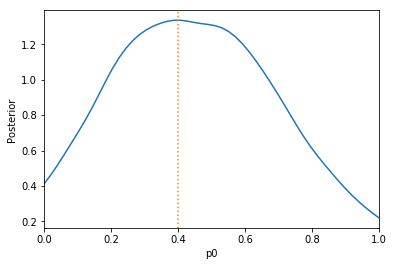

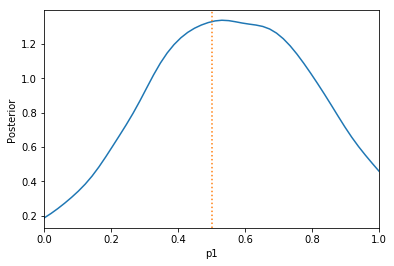

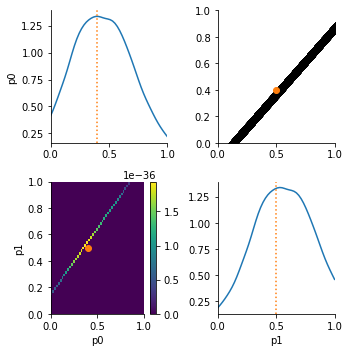

In [7]:
h = pyabc.History("sqlite:///h_incorrect.db")

for p in mv.p_true.keys():
    pyabc.visualization.plot_kde_1d_highlevel(h, x=p, xmin=mv.limits[p][0], xmax=mv.limits[p][1], refval=mv.p_true)
    
pyabc.visualization.plot_kde_matrix_highlevel(h, refval=mv.p_true, limits=mv.limits)

plt.gcf().set_size_inches((5,5))
for fmt in ['svg', 'eps']:
    plt.savefig(f'kde_matrix_incorrect.{fmt}', format=f'{fmt}')

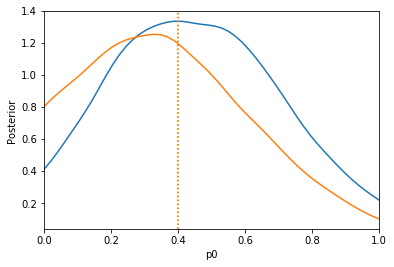

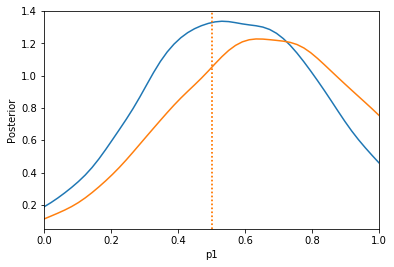

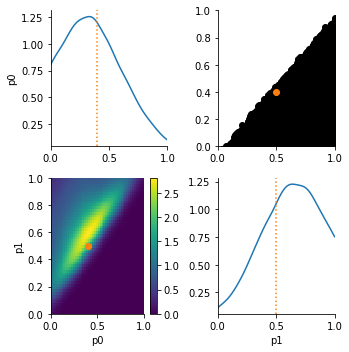

In [8]:
h = pyabc.History("sqlite:///h_incorrect.db")
h2 = pyabc.History("sqlite:///h_stochasticacceptor.db")

for p in mv.p_true.keys():
    _, ax = plt.subplots()
    pyabc.visualization.plot_kde_1d_highlevel(h, x=p, ax=ax, xmin=mv.limits[p][0], xmax=mv.limits[p][1], refval=mv.p_true)
    pyabc.visualization.plot_kde_1d_highlevel(h2, x=p, ax=ax, xmin=mv.limits[p][0], xmax=mv.limits[p][1], refval=mv.p_true)
    
pyabc.visualization.plot_kde_matrix_highlevel(h2, refval=mv.p_true, limits=mv.limits)

plt.gcf().set_size_inches((5,5))
for fmt in ['svg', 'eps']:
    plt.savefig(f'kde_matrix_stochasticacceptor.{fmt}', format=f'{fmt}')